![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [53]:
# Start your code here!
import pandas as pd
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import mannwhitneyu

## Importing and exploring the Datasets  

explore to find out, check for missing values, datatypes for categories 

In [54]:
# importing the men's dataset 
men_results = pd.read_csv('men_results.csv') 

# check info on dataset 
print(men_results.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB
None


In [55]:
# importing the women's dataset 
women_results = pd.read_csv('women_results.csv') 

# check info 
print(women_results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB
None


### Transform date column to date_time object  

Transform the date column for both datasets

In [ ]:
# convert date column data type 
men_results['date'] = pd.to_datetime(men_results['date'])
women_results['date'] = pd.to_datetime(women_results['date'])

# verify 
print(men_results['date'].dtype) 
print(women_results['date'].dtype)

datetime64[ns]
datetime64[ns]


In [57]:
# check for unique values in tournament column
print(list(men_results['tournament'].unique()))  

['Friendly', 'British Home Championship', 'Évence Coppée Trophy', 'Copa Lipton', 'Copa Newton', 'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo', 'Copa Roca', 'Copa América', 'Copa Chevallier Boutell', 'Nordic Championship', 'Central European International Cup', 'Baltic Cup', 'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco', 'FIFA World Cup qualification', 'Bolivarian Games', 'CCCF Championship', 'NAFC Championship', 'Copa Oswaldo Cruz', 'Pan American Championship', 'Copa del Pacífico', "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification', 'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations', 'Copa Paz del Chaco', 'Merdeka Tournament', 'UEFA Euro qualification', 'UEFA Euro', 'Windward Islands Tournament', 'African Cup of Nations qualification', 'Vietnam Independence Cup', 'Copa Carlos Dittborn', 'Phillip Seaga Cup', 'CONCACAF Championship', 'Copa Juan Pinto Durán', 'Arab Cup', 'South Pacific Games', 'CONCACAF Championship qualification', 'Copa Artigas', 'GaNEFo', "

In [58]:
# filter for fifa world cup games played after 2002   

# filter for mens and womens fifa world cup games 
mens_fifa_wc = men_results['tournament'] == 'FIFA World Cup' 
womens_fifa_wc = women_results['tournament'] == 'FIFA World Cup'  

# filter for games played after 2002-01-01 
mens_2002 = men_results['date'] > '2002-01-01'
womens_2002 = women_results['date'] > '2002-01-01' 

# Subsetting with the two filters 
men_goals = men_results[mens_fifa_wc & mens_2002] 
women_goals = women_results[womens_fifa_wc & womens_2002] 

## Hypothesis Testing 

both 
interested in total scores 
we need groups so we create columns 
we need 
determining normality of the groups

In [59]:
# create columns for group and goals scored 

men_goals['group']= 'men' 
men_goals['goals_scored'] = men_goals['home_score'] + men_goals['away_score'] 

women_goals['group'] = 'women'
women_goals['goals_scored'] = women_goals['home_score'] + women_goals['away_score']  

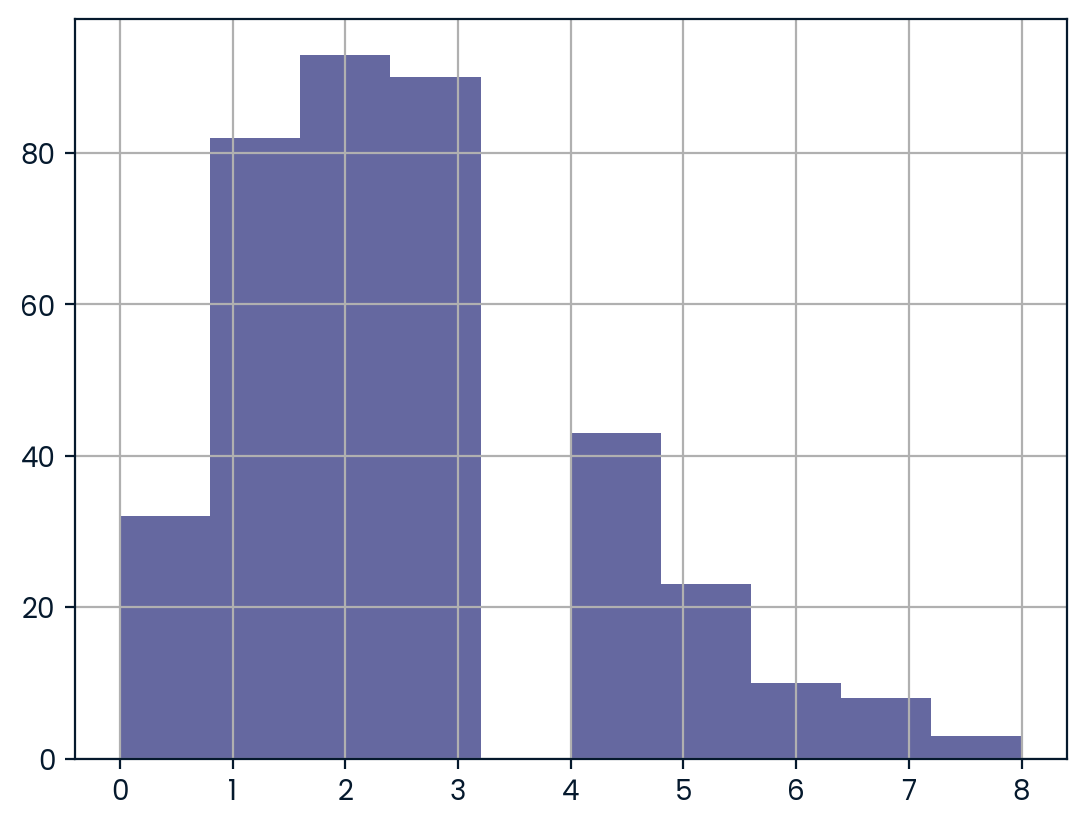

<Figure size 640x480 with 0 Axes>

In [60]:
# checking distributions 

men_goals['goals_scored'].hist()
plt.show()
plt.clf()

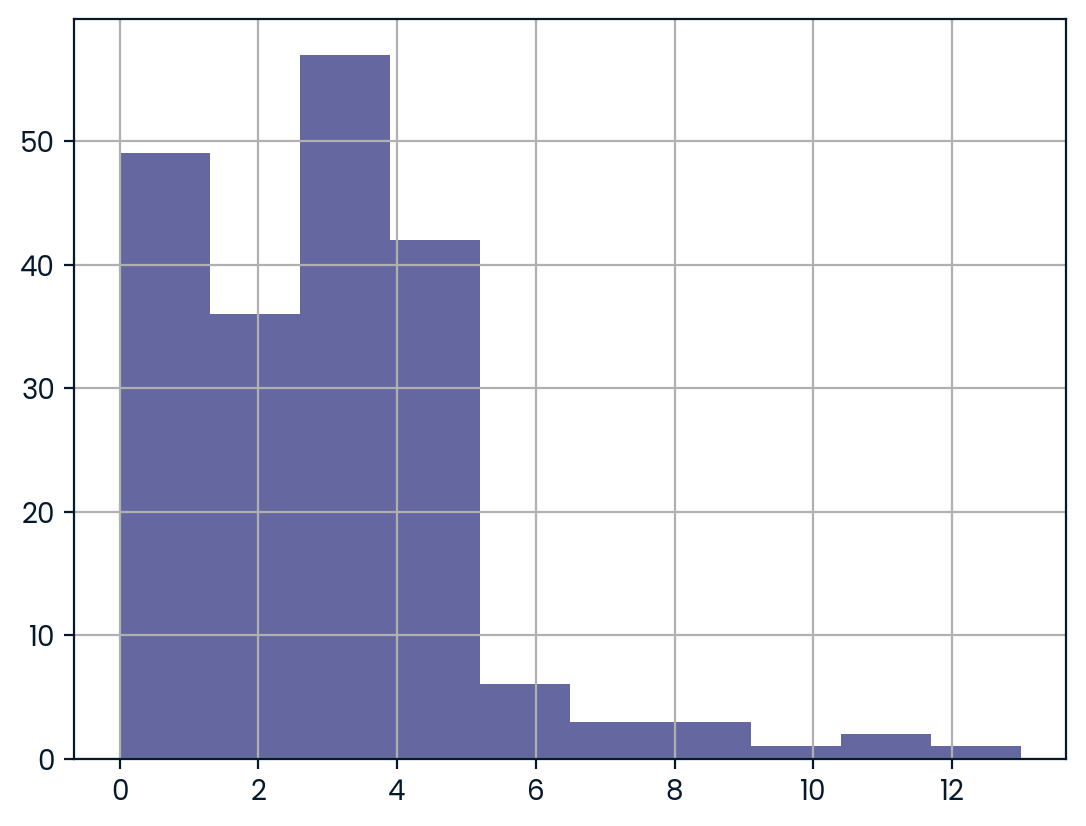

<Figure size 640x480 with 0 Axes>

In [61]:
# checking distributions 

women_goals['goals_scored'].hist()
plt.show()
plt.clf()

In [62]:
# Combine both datasets 
men_women_goals = both = pd.concat([men_goals, women_goals], axis=0, ignore_index=True) 

men_women_goals

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored
0,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,men,1
1,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,men,8
2,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,men,2
3,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,men,3
4,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,men,1
...,...,...,...,...,...,...,...,...,...
579,4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup,women,3
580,4466,2019-07-02,England,United States,1,2,FIFA World Cup,women,3
581,4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup,women,1
582,4468,2019-07-06,England,Sweden,1,2,FIFA World Cup,women,3


In [63]:
# pivot table 
men_women_goals_wide = men_women_goals.pivot(columns="group", values="goals_scored")

men_women_goals_wide

group,men,women
0,1.0,NaN
1,8.0,NaN
2,2.0,NaN
3,3.0,NaN
4,1.0,NaN
...,...,...
579,NaN,3.0
580,NaN,3.0
581,NaN,1.0
582,NaN,3.0


In [64]:
# right tailed wilcox right-tailed Wilcoxon-Mann-Whitney test with pingouin

results_pg = pingouin.mwu(x=men_women_goals_wide["women"],
                          y=men_women_goals_wide["men"],
                          alternative="greater")

In [65]:
# Alternative SciPy solution: Perform right-tailed Wilcoxon-Mann-Whitney test with scipy
results_scipy = mannwhitneyu(x=men_goals["goals_scored"],
                             y=women_goals["goals_scored"],
                             alternative="greater")

In [66]:
# Extract p-value as a float
p_val = results_pg["p-val"].values[0]

# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}

print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}
